In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.__version__

'1.1.5'

In [ ]:
df_advt = pd.read_csv('Advertising.csv')

In [ ]:
df_advt.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df_advt.shape

(200, 4)

In [ ]:
df_advt.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [ ]:
# Sales = b1*TV + b2*radio + b3*newspaper + b0
# y = mx+c -> y = 2x+5

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

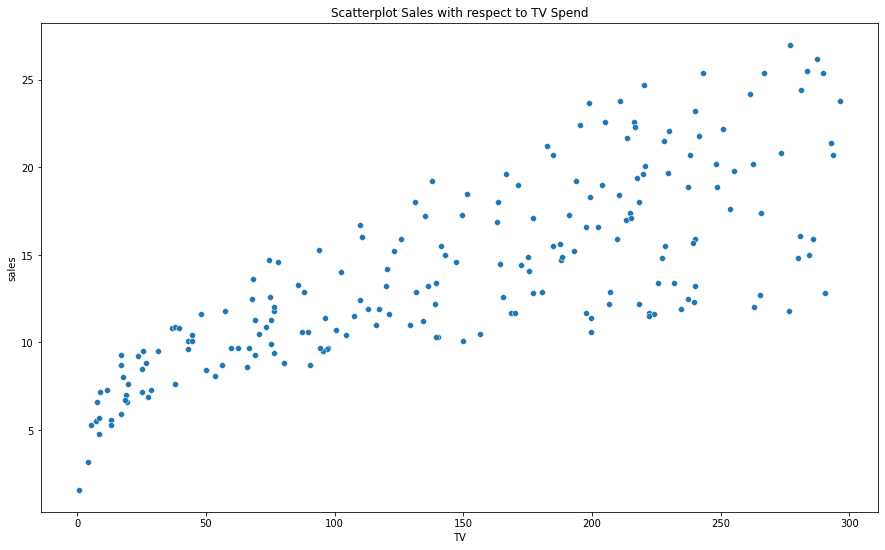

In [ ]:
plt.figure(figsize = (15,9))
sns.scatterplot(data = df_advt, x='TV', y= 'sales')
plt.title("Scatterplot Sales with respect to TV Spend")
plt.show()

In [ ]:
df_advt[['sales','TV']].corr()

,sales,TV
sales,1.000000,0.782224
TV,0.782224,1.000000


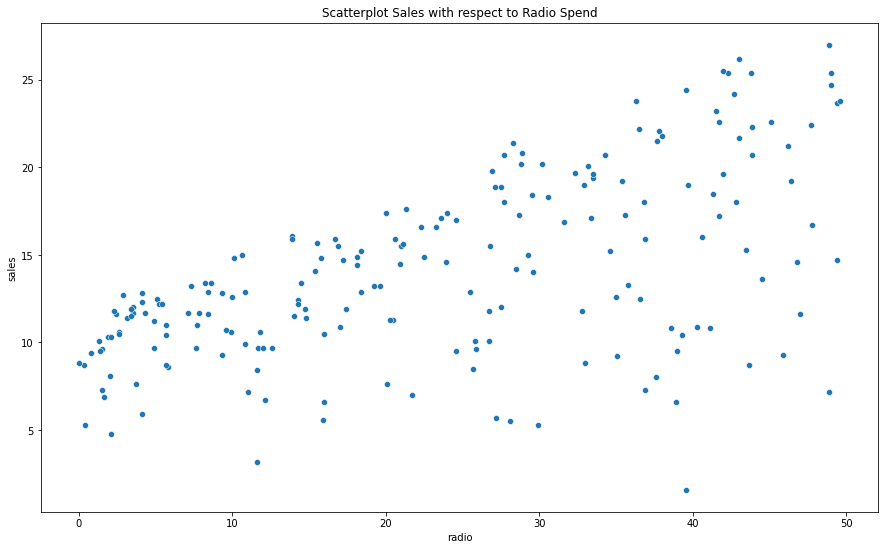

In [ ]:
plt.figure(figsize = (15,9))
sns.scatterplot(data = df_advt, x='radio', y= 'sales')
plt.title("Scatterplot Sales with respect to Radio Spend")
plt.show()

In [ ]:
df_advt[['sales','radio']].corr()

,sales,radio
sales,1.000000,0.576223
radio,0.576223,1.000000


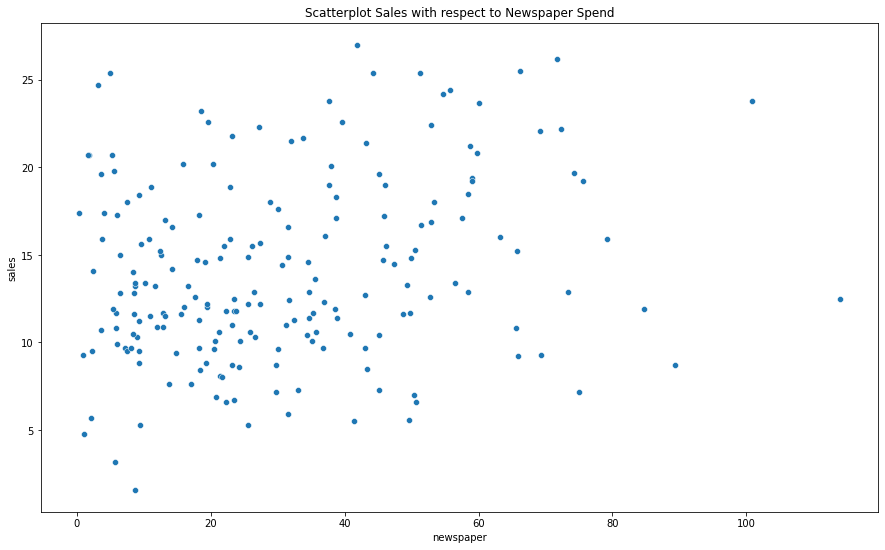

In [ ]:
plt.figure(figsize = (15,9))
sns.scatterplot(data = df_advt, x='newspaper', y= 'sales')
plt.title("Scatterplot Sales with respect to Newspaper Spend")
plt.show()

In [ ]:
df_advt[['sales','newspaper']].corr()

,sales,newspaper
sales,1.000000,0.228299
newspaper,0.228299,1.000000


In [ ]:
df_advt[['sales']].mean()

sales    14.0225
dtype: float64

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
# It will identify the best fit line. 
# Measure distances from all the data points and minimize on the sum of square of this distance

In [ ]:
sm_sales_tv_model = smf.ols(formula = 'sales ~ TV', data = df_advt).fit()

In [ ]:
print(sm_sales_tv_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 14 May 2022   Prob (F-statistic):           1.47e-42
Time:                        05:53:10   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

In [ ]:
# Sales = 0.0475*TV + 7.0326

## Hypothesis testing
## H0: The relationship is not significant
## Ha: The relationship is significant

## p-value < threshold (0.05) then we reject the null hypothesis and accept the alternate hypothesis

In [ ]:
sm_sales_rd_model = smf.ols(formula = 'sales ~ radio', data = df_advt).fit()

In [ ]:
print(sm_sales_rd_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Sat, 14 May 2022   Prob (F-statistic):           4.35e-19
Time:                        05:53:11   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.0

In [ ]:
# Sales = 0.2*radio+9.3

In [ ]:
sm_sales_np_model = smf.ols(formula = 'sales ~ newspaper', data = df_advt).fit()

In [ ]:
print(sm_sales_np_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Sat, 14 May 2022   Prob (F-statistic):            0.00115
Time:                        05:53:12   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.0

In [ ]:
# Sum of Squared Errors -> SUM((predicted - actual)^2) - SSE
# Baseline Model - SST -> SUM((mean - actual)^2)

# R-square = 1 - (SSE/SST)

In [ ]:
sm_sales_tv_rd_model = smf.ols(formula = 'sales ~ TV + radio', data = df_advt).fit()

In [ ]:
print(sm_sales_tv_rd_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 14 May 2022   Prob (F-statistic):           4.83e-98
Time:                        05:53:13   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.0

In [ ]:
sm_sales_tv_rd_np_model = smf.ols(formula = 'sales ~ TV + radio + newspaper', data = df_advt).fit()

In [ ]:
print(sm_sales_tv_rd_np_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 14 May 2022   Prob (F-statistic):           1.58e-96
Time:                        05:53:13   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [ ]:
# Sales = 2.9389 + 0.0458*TV + 0.1885*radio - 0.001*newspaper

In [ ]:
y_pred = sm_sales_tv_rd_model.predict()

In [ ]:
print(y_pred[0:5])

[20.55546463 12.34536229 12.33701773 17.61711596 13.22390813]


In [ ]:
df_advt.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
22.1-20.55546463

1.544535370000002

In [ ]:
sm_sales_tv_rd_model.resid[0]

1.5445353665895638

In [ ]:
# Error = Actual - Predicted
# Mean Squared Error = average of squared errors
# Root Mean Squared Error = SQRT(Mean Squared Error)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
mean_squared_error(y_pred = y_pred, y_true = df_advt['sales'], squared=False) # RMSE

1.6687030593661927

In [ ]:
mean_squared_error(y_pred = y_pred, y_true = df_advt['sales']) # MSE

2.784569900338091

In [ ]:
np.sqrt(2.784569900338091)

1.6687030593661927

In [ ]:
1.67*1.67

2.7889

In [ ]:
mean_absolute_error(y_pred = y_pred, y_true = df_advt['sales'])

1.2537471644234015

In [ ]:
#MAE = average of ABS(Error)

## Complete Model Development

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_advt[['TV','radio']],
                                                    df_advt['sales'],
                                                    train_size = 0.7,
                                                    random_state = 12345
                                                   )

In [ ]:
df_advt.shape

(200, 4)

In [ ]:
X_train.shape

(140, 2)

In [ ]:
X_test.shape

(60, 2)

In [ ]:
# Standard Scaling - z value
# zvalue = (x-mean)/std
# Zvalue -> transform into mean 0 and standard deviation 1

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_sc = scaler.fit_transform(X_train)

In [ ]:
X_train_sc[0:5,:]

array([[-0.9639955 , -0.73152329],
       [-0.5066648 , -0.93561508],
       [-0.03973135, -0.60226515],
       [ 1.77758801, -1.30978336],
       [-1.40452139,  1.06448446]])

In [ ]:
X_test_sc = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
sk_model = LinearRegression()

In [ ]:
sk_model.fit(X_train_sc, y_train)

LinearRegression()

In [ ]:
sk_model.coef_

array([3.63494395, 2.69965172])

In [ ]:
sk_model.intercept_

13.872857142857145

In [ ]:
y_tr_pred = sk_model.predict(X_train_sc) # In Sample Prediction

In [ ]:
#Sales = 3.635*TV(scaled) + 2.6997*Radio (scaled) + 13.872

In [ ]:
y_tr_pred[0:5]

array([ 8.39392945,  9.50532415, 12.10252974, 16.79833102, 11.64123793])

In [ ]:
y_ts_pred = sk_model.predict(X_test_sc) # Out of Sample Prediction

In [ ]:
y_ts_pred[0:5]

array([20.46206382, 10.13636589, 14.10095105,  9.68634163,  8.84089385])

In [ ]:
len(y_ts_pred)

60

In [ ]:
len(y_tr_pred)

140

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mean_squared_error(y_pred = y_tr_pred,  ## Predicted Value 
                   y_true = y_train,  ## Actual Value
                   squared=False)

1.5062905432887082

In [ ]:
mean_squared_error(y_pred = y_ts_pred,  ## Predicted Value 
                   y_true = y_test,  ## Actual Value
                   squared=False)

2.0294029139838985

In [ ]:
r2_score(y_pred=y_tr_pred, y_true= y_train)

0.8997564084489117

In [ ]:
y_ts_pred[0:5]

array([20.46206382, 10.13636589, 14.10095105,  9.68634163,  8.84089385])

In [ ]:
y_test[0:5]

52     22.6
157    10.1
135    11.6
140    10.9
56      5.5
Name: sales, dtype: float64